In [ ]:
# FITE7410 Financial Fraud Analytics First Semester, 2025-2026 -----------------
# Assignnment 1 Exploratory Data Analysis (EDA)
# Student: Choi Chi For 3036384024
# Due Date: 19 Oct, 2025 (Sun) 23:59
# Objective of this assignment:
# 1. Perform data cleaning and preparation
# 2. Explore and visualize the data to identify patterns and trends
# 3. Engineer new features based on domain knowledge or insights from EDA
# 4. Prepare a report summarizing the findings from EDA

# Load necessary libraries with improved error handling ------------------
.libPaths(Sys.getenv("R_LIBS_USER"))
dir.create(Sys.getenv("R_LIBS_USER"), recursive = TRUE, showWarnings = FALSE)

# Install essential packages individually to avoid tidyverse dependencies
essential_packages <- c("dplyr", "tidyr", "ggplot2", "corrplot", "stringr")
install.packages("farver", lib = Sys.getenv("R_LIBS_USER"), repos = "https://cran.r-project.org")
cat("Installing essential R packages...\n")
for (pkg in essential_packages) {
  if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    install.packages(pkg, lib = Sys.getenv("R_LIBS_USER"), 
                     repos = "https://cran.r-project.org", 
                     dependencies = TRUE)
  }
}

# Load libraries with suppressed startup messages
suppressPackageStartupMessages({
  library(dplyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(tidyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(ggplot2, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(corrplot, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(stringr, lib.loc = Sys.getenv("R_LIBS_USER"))
})

cat("✓ Essential packages loaded successfully!\n")
cat("Note: Using individual packages instead of full tidyverse to avoid system dependency issues.\n")

In [34]:
#  Load data -------------------------------------------------------------------
tryCatch({
  data <- data.frame(read.csv("A1_data.csv"))
}, warning = function(w) {
  
  print(w)
}, error = function(e) {
  print(e)
}, finally = {
print("Data loading attempt finished.")
})

head(data)

[1] "Data loading attempt finished."


,TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,dist2,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,2987004,0,86506,24,82.9000,TP,402,73,NA,NA,⋯,samsung browser 6.2,32,2220x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2,2987011,0,86555,24,27.2817,LY,NA,NA,NA,30,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,
3,2987016,0,86620,24,49.7000,TP,152,73,NA,NA,⋯,chrome 62.0,24,1280x800,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
4,2987022,0,86786,24,82.9000,TP,281,73,NA,NA,⋯,,NA,,,NA,NA,NA,NA,,
5,2987038,0,87172,24,41.4000,AD,312,73,NA,98,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
6,2987040,0,87209,24,125.8724,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows


In [35]:
#  View summary statistics of the dataset --------------------------------------
summary(data)

     TxnID            isFraud           TxnDT            TxnDTHour   
 Min.   :2987004   Min.   :0.0000   Min.   :   86506   Min.   :  24  
 1st Qu.:3078716   1st Qu.:0.0000   1st Qu.: 1900286   1st Qu.: 527  
 Median :3203512   Median :0.0000   Median : 5031202   Median :1397  
 Mean   :3238037   Mean   :0.1132   Mean   : 6209720   Mean   :1724  
 3rd Qu.:3393812   3rd Qu.:0.0000   3rd Qu.:10272711   3rd Qu.:2853  
 Max.   :3577534   Max.   :1.0000   Max.   :15811030   Max.   :4391  
                                                                     
     TxnAmt           ProductCD             addr1           addr2       
 Min.   :   0.3515   Length:100000      Min.   : 82.0   Min.   : 18.00  
 1st Qu.:  42.0955   Class :character   1st Qu.:186.0   1st Qu.: 73.00  
 Median :  82.9000   Mode  :character   Median :281.0   Median : 73.00  
 Mean   : 138.7709                      Mean   :278.6   Mean   : 73.01  
 3rd Qu.: 165.9000                      3rd Qu.:312.0   3rd Qu.: 73.00  
 M

In [36]:
# View the percentage of missing values in column with numeric value ----------------------------
numeric_cols <- sapply(data, is.numeric)
missing_percentage <- sapply(data[, numeric_cols], function(x) {
  sum(is.na(x)) / length(x) * 100
})
missing_percentage <- data.frame(missing_percentage[missing_percentage > 0])

# View the percentage of the value = "" in the column with character value ----------------------------
char_cols <- sapply(data, is.character)
empty_string_percentage <- sapply(data[, char_cols], function(x) {
  sum(x == "", na.rm = TRUE) / length(x) * 100
})
empty_string_percentage <- data.frame(empty_string_percentage[empty_string_percentage > 0])

# Fix: Ensure both data frames have the same column structure
missing_data_summary <- data.frame()

# Add missing values data if any exist
if(nrow(missing_percentage) > 0) {
  missing_df <- data.frame(
    Metric = "Missing Values (%)",
    Column = rownames(missing_percentage),
    Percentage = missing_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, missing_df)
}

# Add empty strings data if any exist
if(nrow(empty_string_percentage) > 0) {
  empty_df <- data.frame(
    Metric = "Empty Strings (%)",
    Column = rownames(empty_string_percentage),
    Percentage = empty_string_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, empty_df)
}

# Set proper row names
rownames(missing_data_summary) <- NULL
print(missing_data_summary)

               Metric        Column Percentage
1  Missing Values (%)         addr1     42.881
2  Missing Values (%)         addr2     42.881
3  Missing Values (%)         dist2     73.694
4  Missing Values (%)         card2      0.688
5  Missing Values (%)         card3      0.115
6  Missing Values (%)         card5      0.660
7  Missing Values (%)            D1      0.155
8  Missing Values (%)            D2     78.733
9  Missing Values (%)            D3     79.692
10 Missing Values (%)            D4     54.271
11 Missing Values (%)            D5     76.124
12 Missing Values (%)            D6     52.588
13 Missing Values (%)            D7     74.148
14 Missing Values (%)            D8     47.606
15 Missing Values (%)            D9     47.606
16 Missing Values (%)           D10     51.253
17 Missing Values (%)           D12     58.199
18 Missing Values (%)           D13     56.376
19 Missing Values (%)           D14     56.054
20 Missing Values (%)           D15     51.915
21 Missing Va

In [37]:
# Select the column with the percentage of missing values is less than 50% ----------------------------
cols_to_keep <- setdiff(names(data), missing_data_summary$Column[missing_data_summary$Percentage > 50])
data <- data.frame(data[, cols_to_keep])

# get the column names of data after removing columns with more than 50% missing values
colnames(data)

[1] "TxnID"         "isFraud"       "TxnDT"         "TxnDTHour"    
 [5] "TxnAmt"        "ProductCD"     "addr1"         "addr2"        
 [9] "dist1"         "card1"         "card2"         "card3"        
[13] "card4"         "card5"         "card6"         "P_emaildomain"
[17] "R_emaildomain" "C1"            "C2"            "C3"           
[21] "C4"            "C5"            "C6"            "C7"           
[25] "C8"            "C9"            "C10"           "C11"          
[29] "C12"           "C13"           "C14"           "D1"           
[33] "D8"            "D9"            "D11"           "M1"           
[37] "M2"            "M3"            "M5"            "M6"           
[41] "M7"            "M8"            "M9"            "V310"         
[45] "V311"          "V312"          "V313"          "V314"         
[49] "id_01"         "id_02"         "id_05"         "id_06"        
[53] "id_09"         "id_10"         "id_11"         "id_12"        
[57] "id_13"         "id_14"         "id_15"         "id_16"        
[61] "id_17"         "id_19"         "id_20"         "id_28"        
[65] "id_29"         "id_30"         "id_31"         "id_32"        
[69] "id_34"         "id_35"         "id_36"         "id_37"        
[73] "id_38"         "DevType"       "DevInfo"

In [38]:
# view the unique values in each column ----------------------------------------------
unique_values <- sapply(data, function(x) length(unique(x)))
unique_values <- data.frame(Variable = names(unique_values), Unique_Values = unique_values)
print(unique_values)

                   Variable Unique_Values
TxnID                 TxnID        100000
isFraud             isFraud             2
TxnDT                 TxnDT         99292
TxnDTHour         TxnDTHour          4193
TxnAmt               TxnAmt          6803
ProductCD         ProductCD             4
addr1                 addr1           221
addr2                 addr2            68
dist1                 dist1             1
card1                 card1          7337
card2                 card2           473
card3                 card3            96
card4                 card4             5
card5                 card5           100
card6                 card6             4
P_emaildomain P_emaildomain            10
R_emaildomain R_emaildomain            10
C1                       C1          1291
C2                       C2          1060
C3                       C3            18
C4                       C4           960
C5                       C5             1
C6                       C6       

In [39]:
# transform the data in columns with character value == "" to "unknown" ----------------------------
data[data == ""] <- "Empty Value"

In [40]:
# Convert TxnDT to DateTime format and extract useful features ----------------------------
data <- data %>% mutate(TxnDT = as.POSIXct(TxnDT, origin = "1970-01-01", tz = "UTC"))
data <- data %>% mutate(TransactionHour = as.numeric(format(TxnDT, "%H")),
                        TransactionDay = as.numeric(format(TxnDT, "%d")),
                        TransactionMonth = as.numeric(format(TxnDT, "%m")),
                        TransactionWeekday = as.numeric(format(TxnDT, "%u")))  # 1 = Monday, 7 = Sunday   


     0      1 
88.682 11.318 

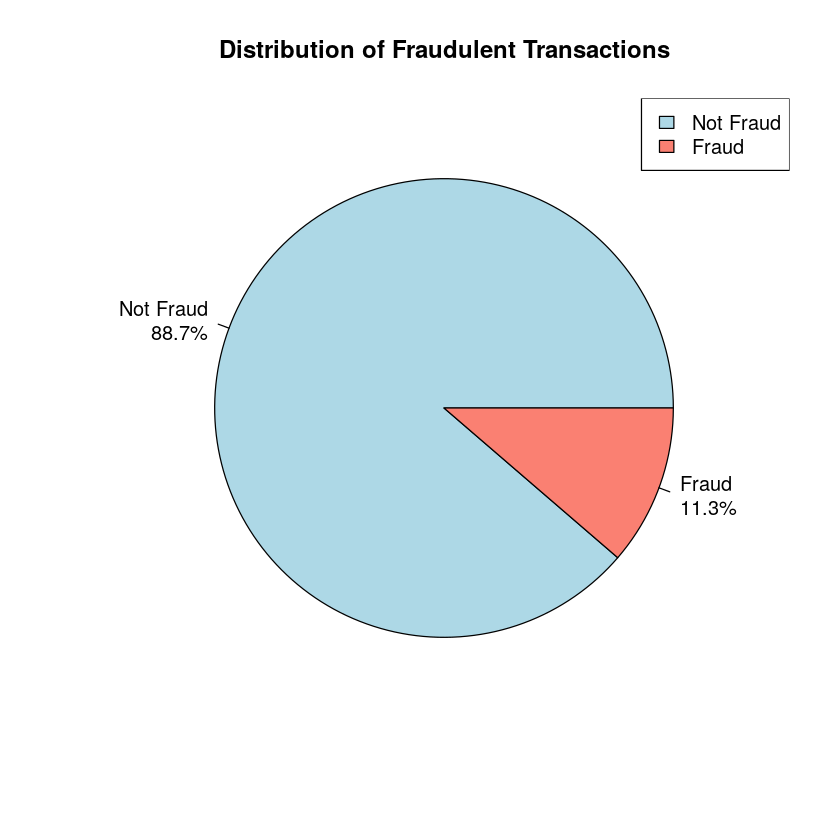

In [41]:
# view the percentage of isFraud in the dataset --------------------------------------
table(data$isFraud) / nrow(data) * 100

# visualize the distribution of isFraud using the pie chart --------------------------------------
fraud_counts <- table(data$isFraud)
fraud_labels <- c("Not Fraud", "Fraud")
fraud_colors <- c("lightblue", "salmon")
fraud_percentages <- round(fraud_counts / sum(fraud_counts) * 100, 1)
fraud_labels <- paste(fraud_labels, "\n", fraud_percentages, "%", sep = "")
pie(fraud_counts, labels = fraud_labels, col = fraud_colors, main = "Distribution of Fraudulent Transactions")
legend("topright", legend = c("Not Fraud", "Fraud"), fill = fraud_colors)

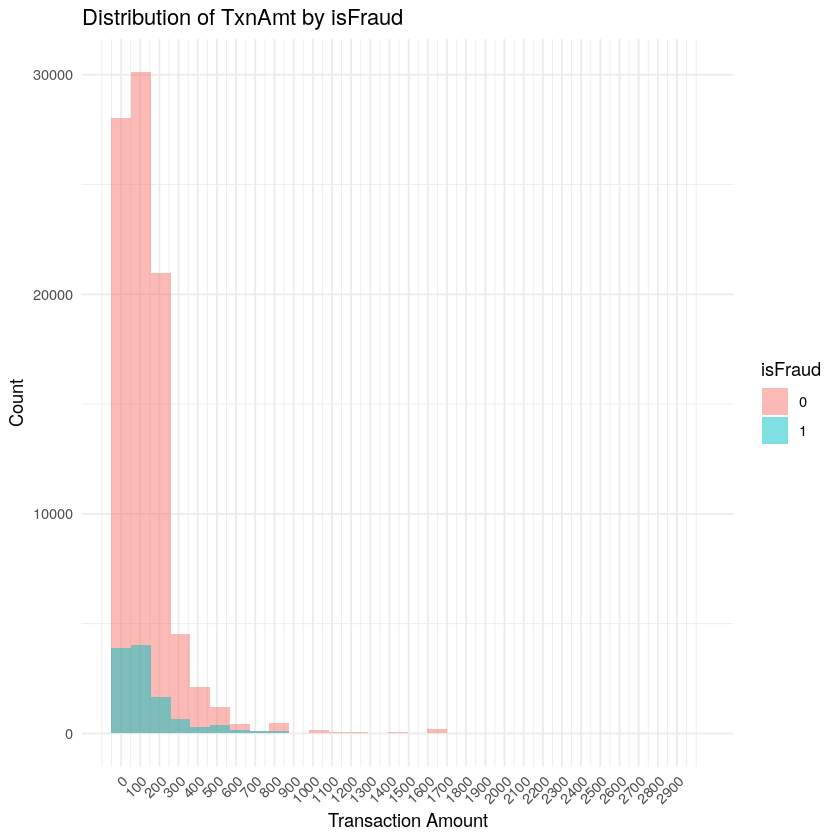

In [42]:
# view the distribution of TxnAmt group by isFraud == 0 and isFraud == 1 
ggplot(data, aes(x = TxnAmt, fill = factor(isFraud))) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Distribution of TxnAmt by isFraud",
       x = "Transaction Amount",
       y = "Count",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

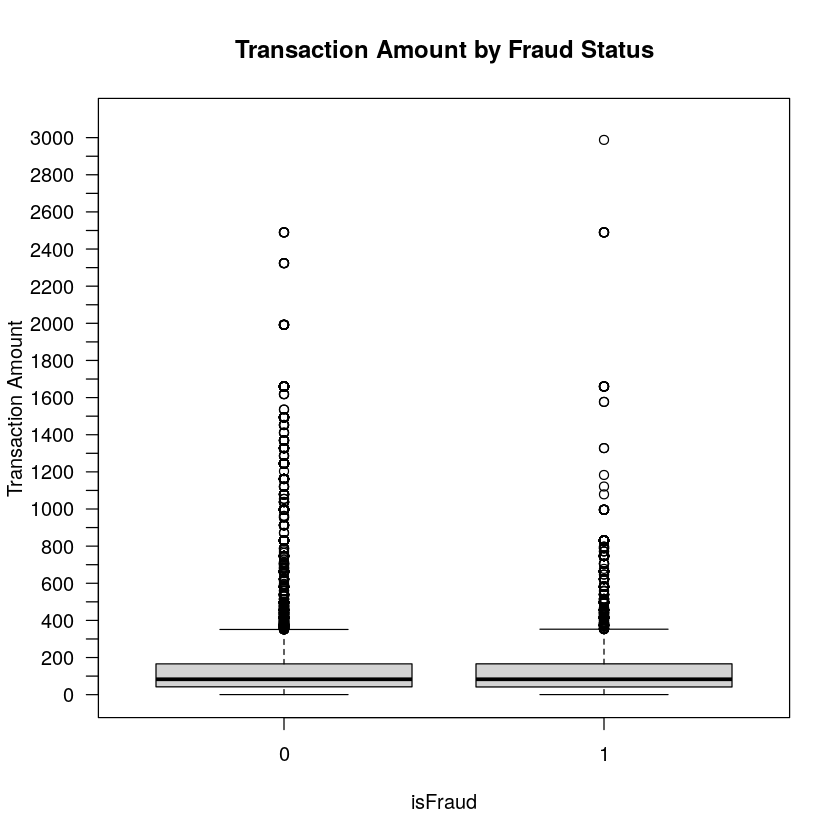

In [43]:
# view the distribution of TxnAmt group by isFraud using boxplots

boxplot(TxnAmt ~ isFraud, data = data, main = "Transaction Amount by Fraud Status", 
        xlab = "isFraud", ylab = "Transaction Amount", ylim=c(0, max(data$TxnAmt, na.rm=TRUE) + 100), yaxt="n")
axis(2, at=seq(0, max(data$TxnAmt, na.rm=TRUE) + 100, by=100), las=2)

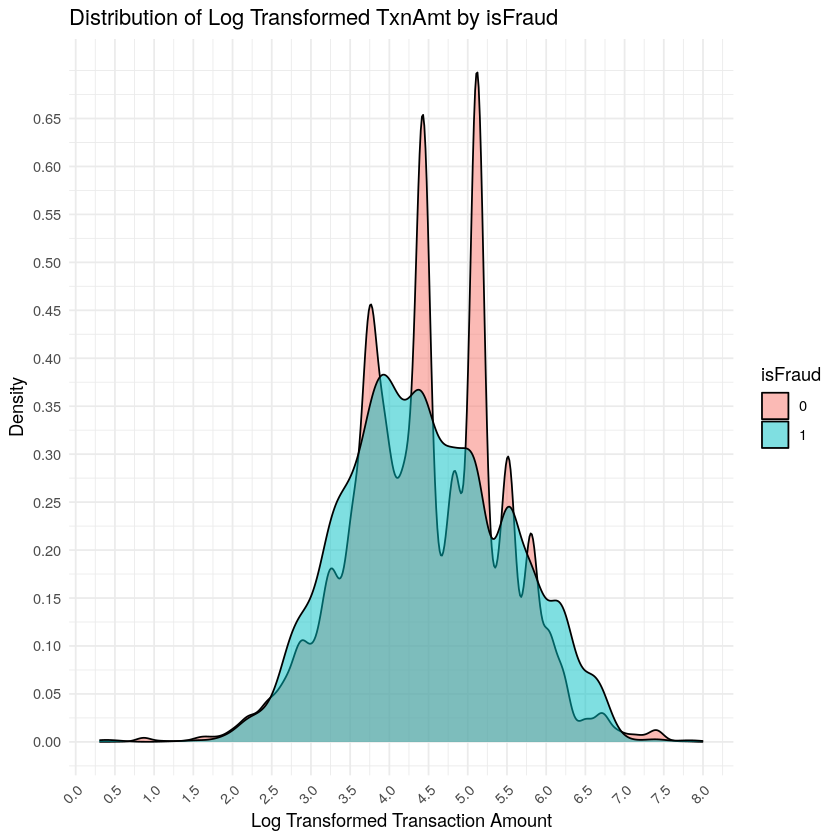

In [44]:
# view the log transformation of TxnAmt and y tick size = 0.05 and  x tick size = 0.5 ------------------------------------------------
data <- data %>% mutate(Log_TxnAmt = log(TxnAmt + 1))  # Adding 1 to avoid log(0) 

ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Log Transformed TxnAmt by isFraud",
       x = "Log Transformed Transaction Amount", 
       y = "Density",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$Log_TxnAmt, na.rm = TRUE), by = 0.5)) +     
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  +
  scale_y_continuous(breaks = seq(0, max(ggplot_build(ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5))$data[[1]]$density, na.rm = TRUE), by = 0.05))

`summarise()` has grouped output by 'isFraud'. You can override using the
`.groups` argument.


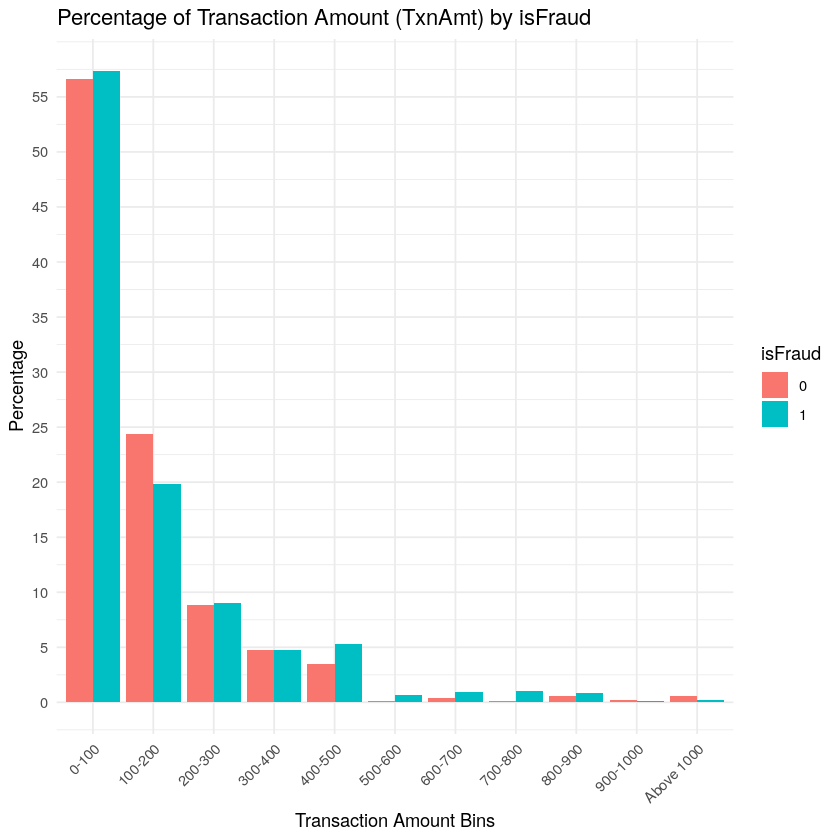

In [45]:
# Visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 where isFraud == 0 and isFraud ==1
data_fraud <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(isFraud, TxnAmt_Bin) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)
  
# visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 where isFraud == 0 and isFraud ==1 -----------------------------------------------
ggplot(data_fraud, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) by isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data_fraud$Percentage, na.rm = TRUE), by = 5))

`summarise()` has grouped output by 'TxnAmt_Bin'. You can override using the
`.groups` argument.


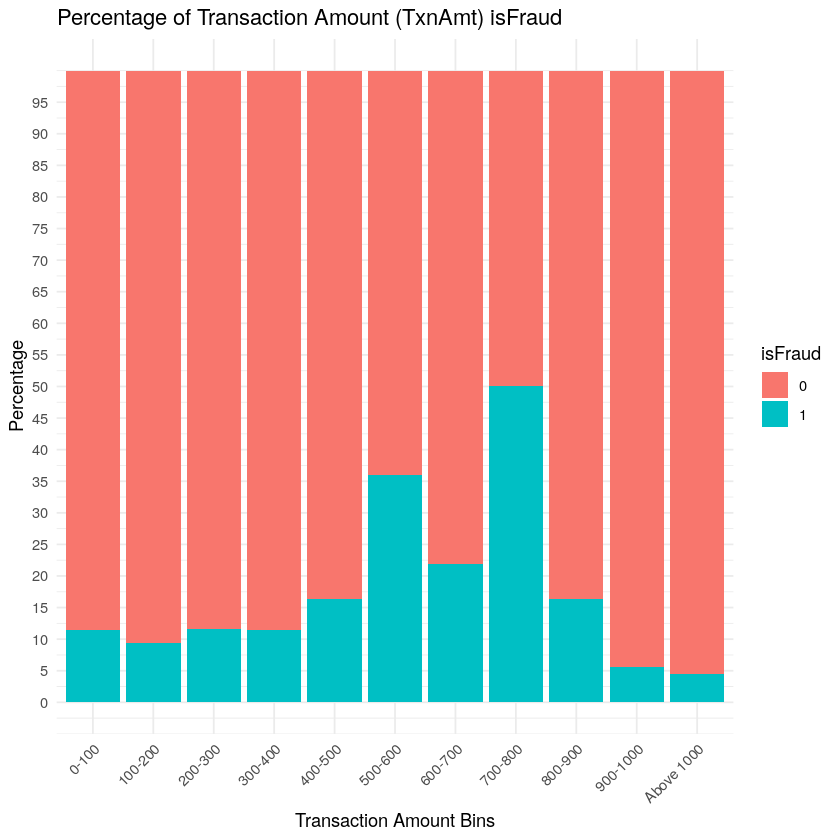

In [46]:
# view TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud ------------------------------------------------
original_data <- data
data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

# visualize TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

`summarise()` has grouped output by 'TransactionMonth'. You can override using
the `.groups` argument.


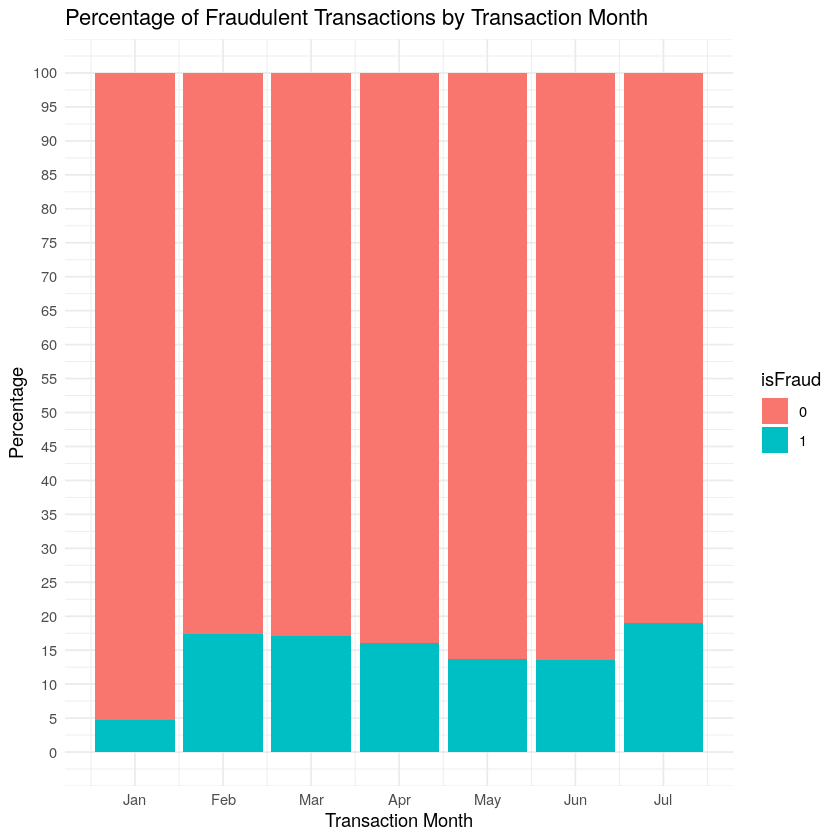

In [47]:
# view the precentage of isFraud and non-fraud by TransactionWeekday ------------------------------------------------
data %>%
  group_by(TransactionMonth, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionMonth, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Month",
       x = "Transaction Month", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 1:12, labels = month.abb)

`summarise()` has grouped output by 'TransactionWeekday'. You can override
using the `.groups` argument.


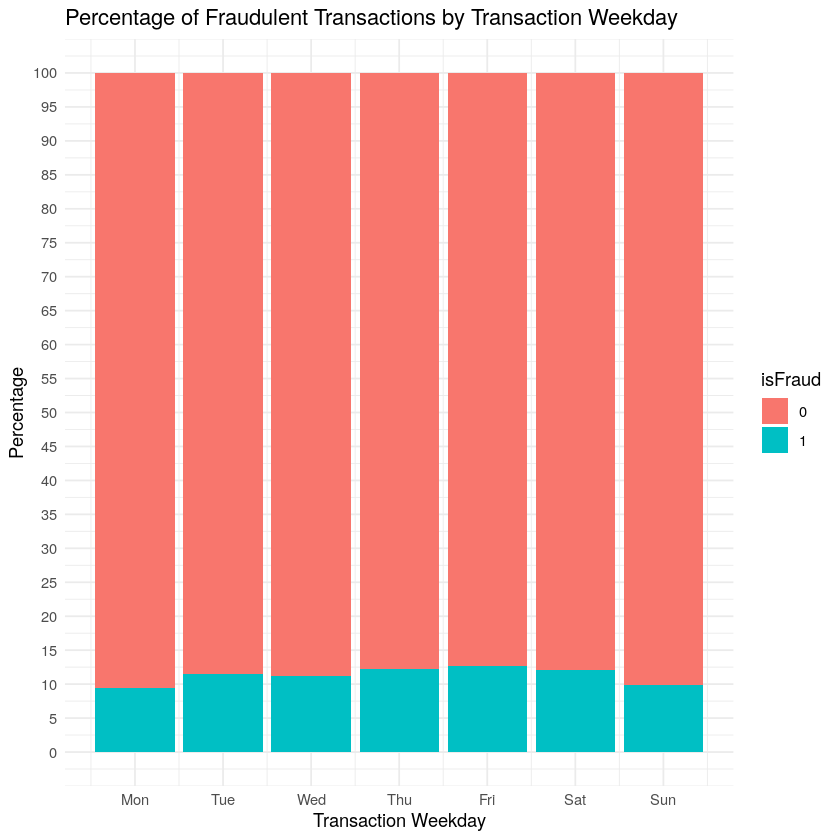

In [48]:
# view the precentage of isFraud and non-fraud by TransactionWeekday ------------------------------------------------
data %>%
  group_by(TransactionWeekday, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionWeekday, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Weekday",
       x = "Transaction Weekday", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 1:7, labels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

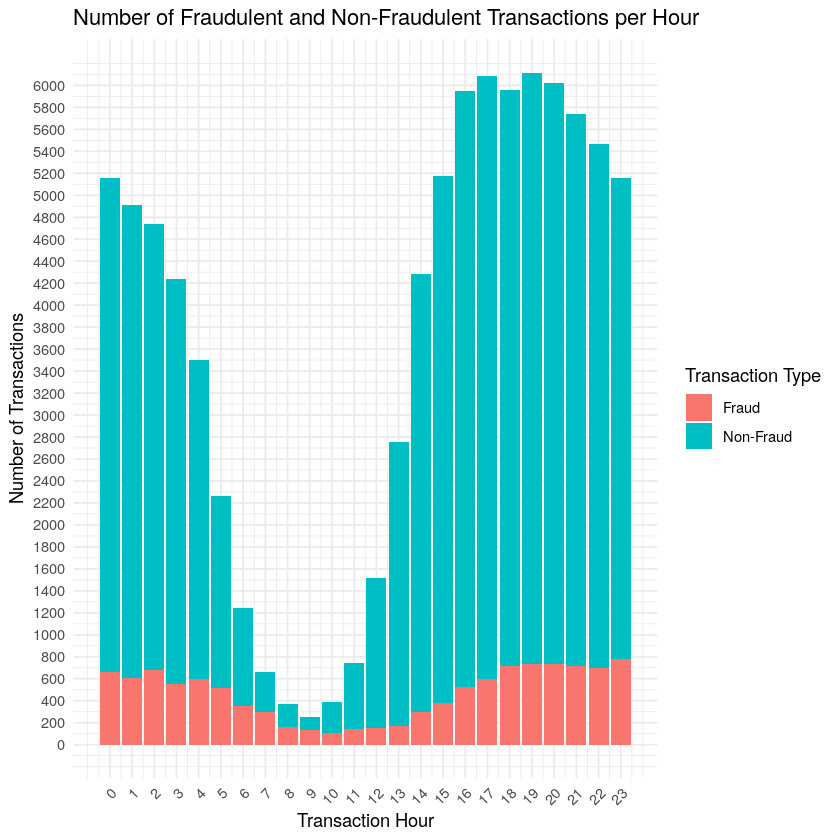

In [51]:
# count the number of transactions per hour ----------------------------------------------
transactions_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(Count = n())

# count the number of isFraud and non-fraud per hour ---------------------------------------------- 
fraud_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per hour with tick-size in y-axis = 200 and x-axis from 0-23 ----------------------------------------------
ggplot(fraud_per_hour, aes(x = TransactionHour)) +
  geom_bar(aes(y = NonFraudCount, fill = "Non-Fraud"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = FraudCount, fill = "Fraud"), stat = "identity", position = "dodge") +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Hour",
       x = "Transaction Hour",
       y = "Number of Transactions",
       fill = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) +
  scale_y_continuous(breaks = seq(0, max(fraud_per_hour$NonFraudCount, fraud_per_hour$FraudCount, na.rm = TRUE), by = 200)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`summarise()` has grouped output by 'TransactionHour'. You can override using
the `.groups` argument.


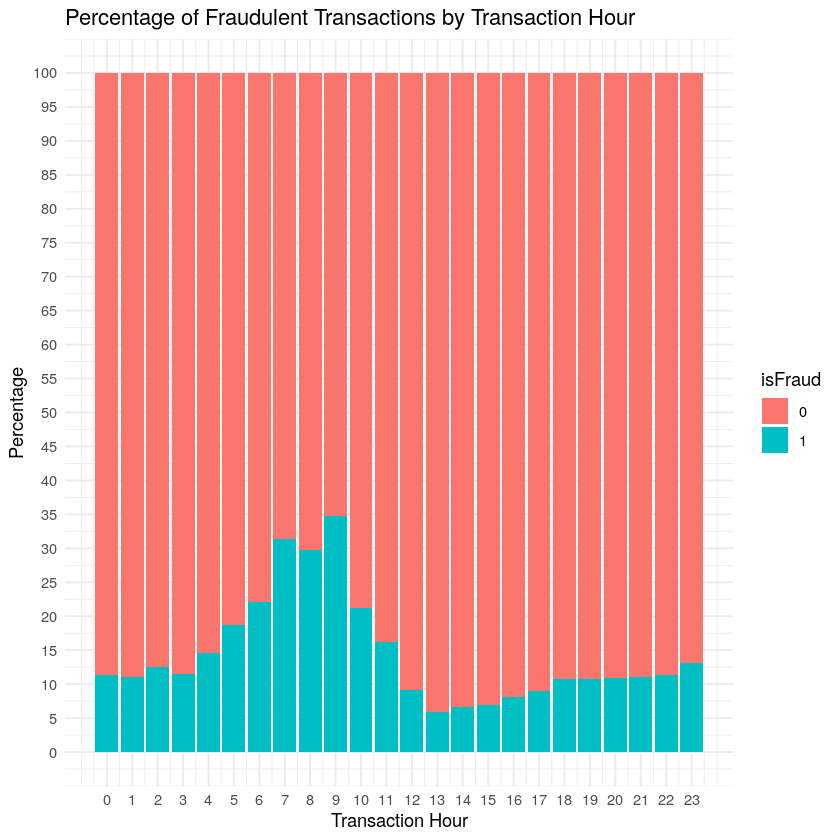

In [59]:
# view the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
fraud_non_fraud_percentage_per_hour <- fraud_per_hour %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)

# visualize the percentage of isFraud and non-fraud by TransactionHour by bar chart ------------------------------------------------
  data %>%
  group_by(TransactionHour, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionHour, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Hour",
       x = "Transaction Hour", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 0:23)

[1] 1231


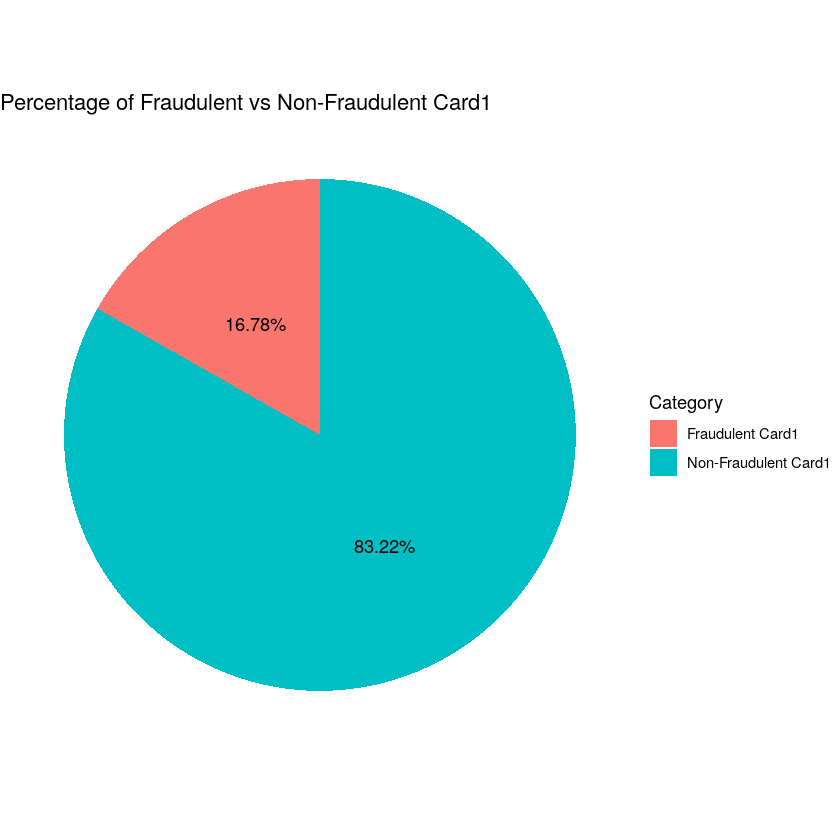

In [60]:
# view the count unique value of Card1 where any isFraud == 1 ------------------------------------------------
fraudulent_card1 <- unique(data$card1[data$isFraud == 1])
num_fraudulent_card1 <- length(fraudulent_card1)
print(num_fraudulent_card1)

# view the percentage of fraudulent_card1 in pie chart------------------------------------------------
fraudulent_card1_percentage <- (num_fraudulent_card1 / length(unique(data$card1))) * 100
non_fraudulent_card1_percentage <- 100 - fraudulent_card1_percentage
pie_data <- data.frame(
  Category = c("Fraudulent Card1", "Non-Fraudulent Card1"),
  Percentage = c(fraudulent_card1_percentage, non_fraudulent_card1_percentage)
)
ggplot(pie_data, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card1") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5)) 

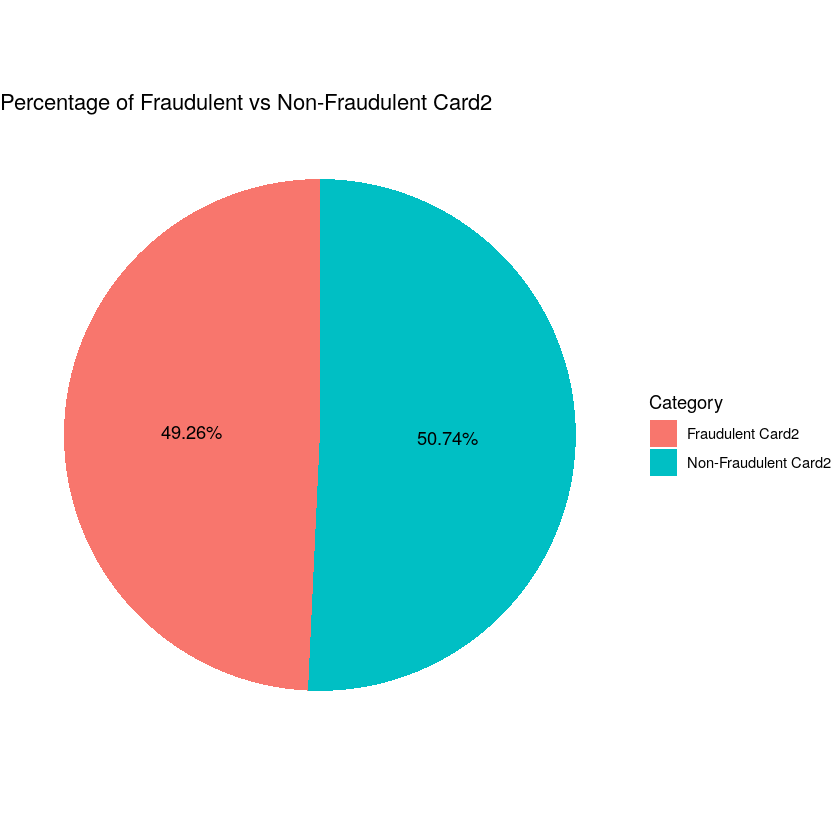

In [62]:
# view the count unique value of Card2 where any isFraud == 1
fraudulent_card2 <- unique(data$card2[data$isFraud == 1])
num_fraudulent_card2 <- length(fraudulent_card2)

# view the percentage of fraudulent_card2 in pie chart
fraudulent_card2_percentage <- (num_fraudulent_card2 / length(unique(data$card2))) * 100
non_fraudulent_card2_percentage <- 100 - fraudulent_card2_percentage
pie_data_card2 <- data.frame(
  Category = c("Fraudulent Card2", "Non-Fraudulent Card2"),
  Percentage = c(fraudulent_card2_percentage, non_fraudulent_card2_percentage)
)
ggplot(pie_data_card2, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card2") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5))

[1] 57


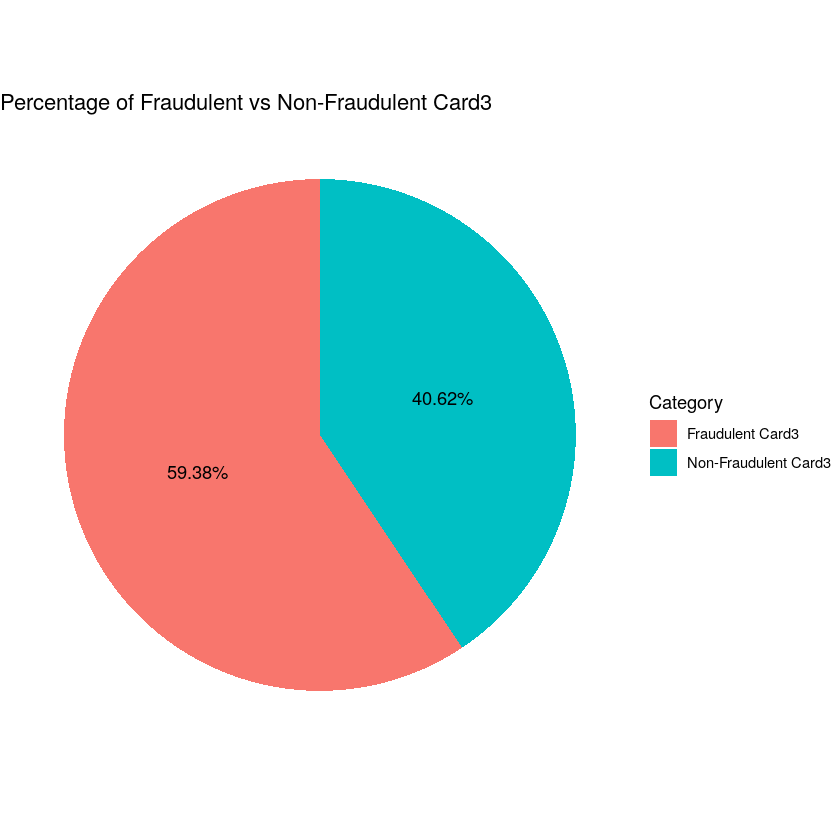

In [63]:
# view the count unique value of Card3 where any isFraud == 1
fraudulent_card3 <- unique(data$card3[data$isFraud == 1])
num_fraudulent_card3 <- length(fraudulent_card3)
print(num_fraudulent_card3)

# view the percentage of fraudulent_card3 in pie chart
fraudulent_card3_percentage <- (num_fraudulent_card3 / length(unique(data$card3))) * 100
non_fraudulent_card3_percentage <- 100 - fraudulent_card3_percentage
pie_data_card3 <- data.frame(
  Category = c("Fraudulent Card3", "Non-Fraudulent Card3"),
  Percentage = c(fraudulent_card3_percentage, non_fraudulent_card3_percentage)
)
ggplot(pie_data_card3, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card3") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5))

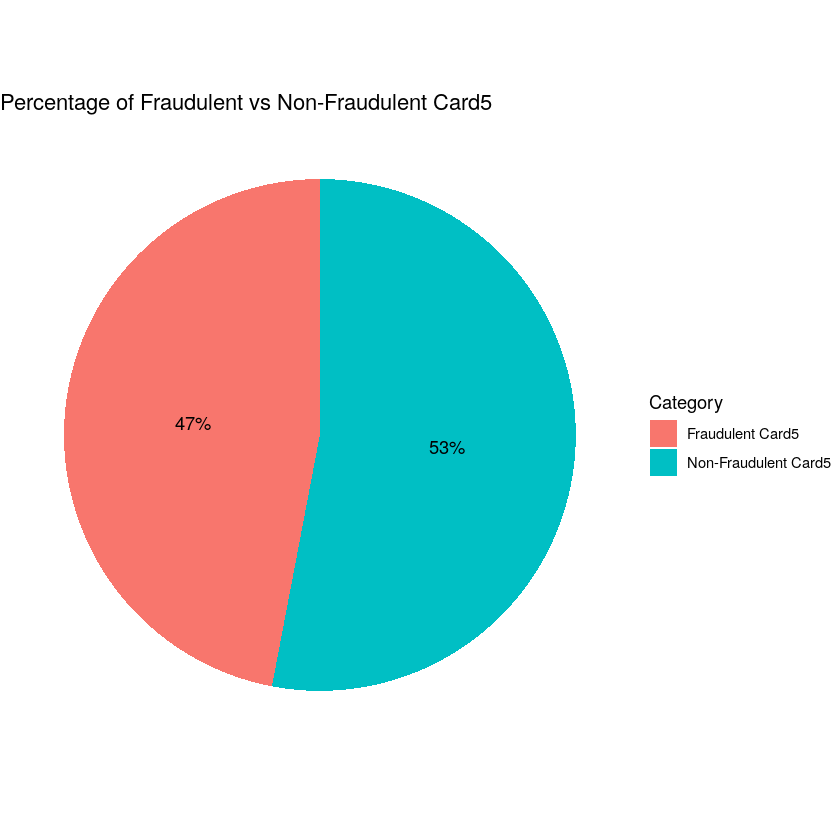

In [64]:
# view the count unique value of Card5 where any isFraud == 1
fraudulent_card5 <- unique(data$card5[data$isFraud == 1])
num_fraudulent_card5 <- length(fraudulent_card5)

# view the percentage of fraudulent_card5 in pie chart
fraudulent_card5_percentage <- (num_fraudulent_card5 / length(unique(data$card5))) * 100
non_fraudulent_card5_percentage <- 100 - fraudulent_card5_percentage
pie_data_card5 <- data.frame(
  Category = c("Fraudulent Card5", "Non-Fraudulent Card5"),
  Percentage = c(fraudulent_card5_percentage, non_fraudulent_card5_percentage)
)
ggplot(pie_data_card5, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card5") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5))

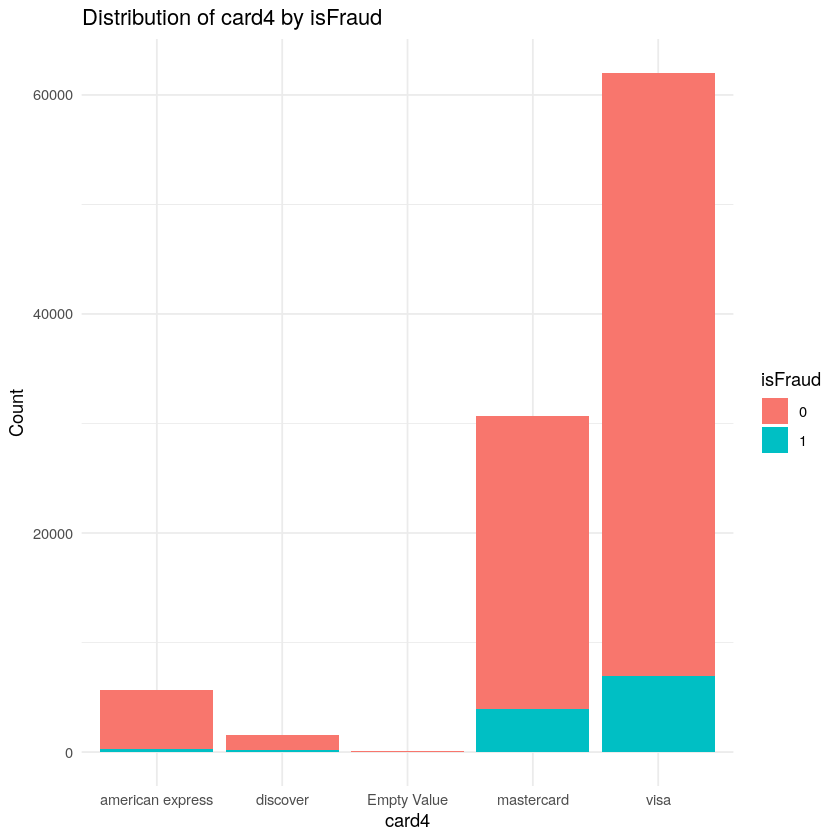

In [65]:
# view the distribution of card4 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card4, fill = factor(isFraud))) +
  geom_bar() +
  labs(title = "Distribution of card4 by isFraud",
       x = "card4",
       y = "Count",
       fill = "isFraud") +
  theme_minimal()

# A tibble: 5 × 5
  card4            FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                 <int>         <int>           <dbl>              <dbl>
1 Empty Value              14           109           11.4                88.6
2 american express        239          5400            4.24               95.8
3 discover                177          1375           11.4                88.6
4 mastercard             3920         26760           12.8                87.2
5 visa                   6968         55038           11.2                88.8


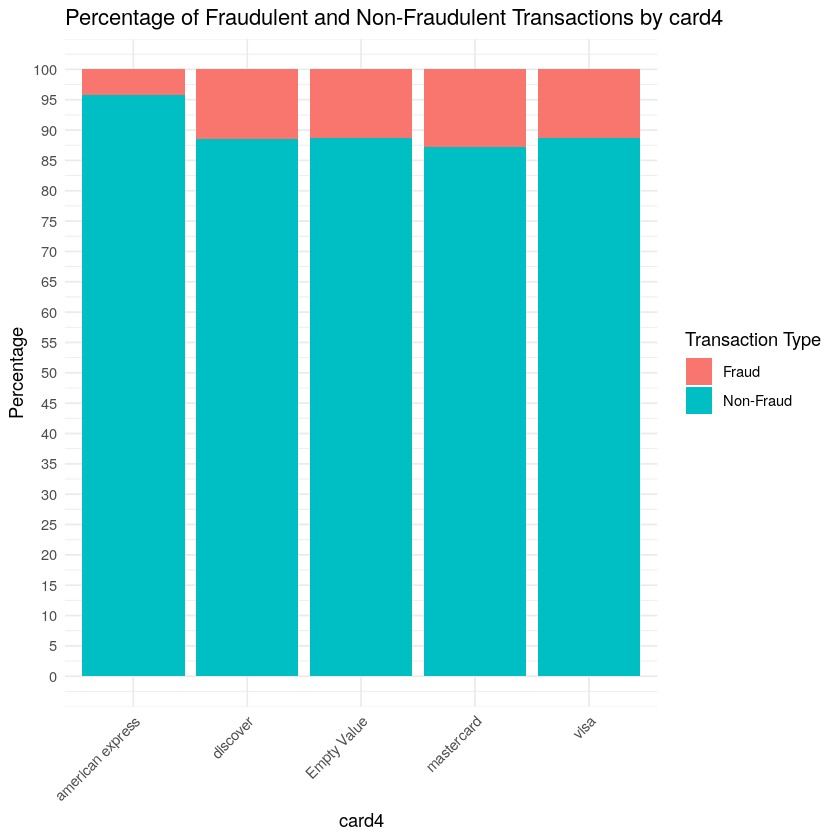

In [66]:
# view the percentage of card4 group by isFraud ------------------------------------------------
card4_fraud_percentage <- data %>%
  group_by(card4) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card4_fraud_percentage)

# visualize the percentage of isFraud and non-fraud by card4 by bar chart ------------------------------------------------
# First, reshape the data for better plotting
card4_plot_data <- card4_fraud_percentage %>%
  select(card4, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(card4_plot_data, aes(x = card4, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by card4",
       x = "card4",
       y = "Percentage",
       fill = "Transaction Type")

# A tibble: 4 × 5
  card6       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value         12           106           10.2                89.8
2 charge card          0             9            0                 100  
3 credit            6693         45585           12.8                87.2
4 debit             4613         42982            9.69               90.3


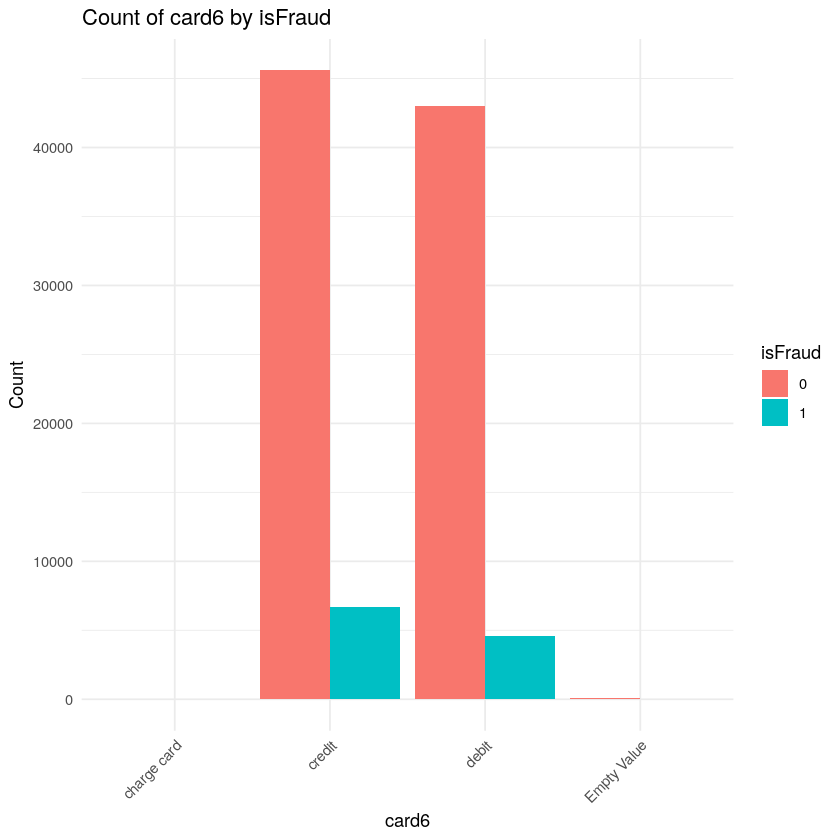

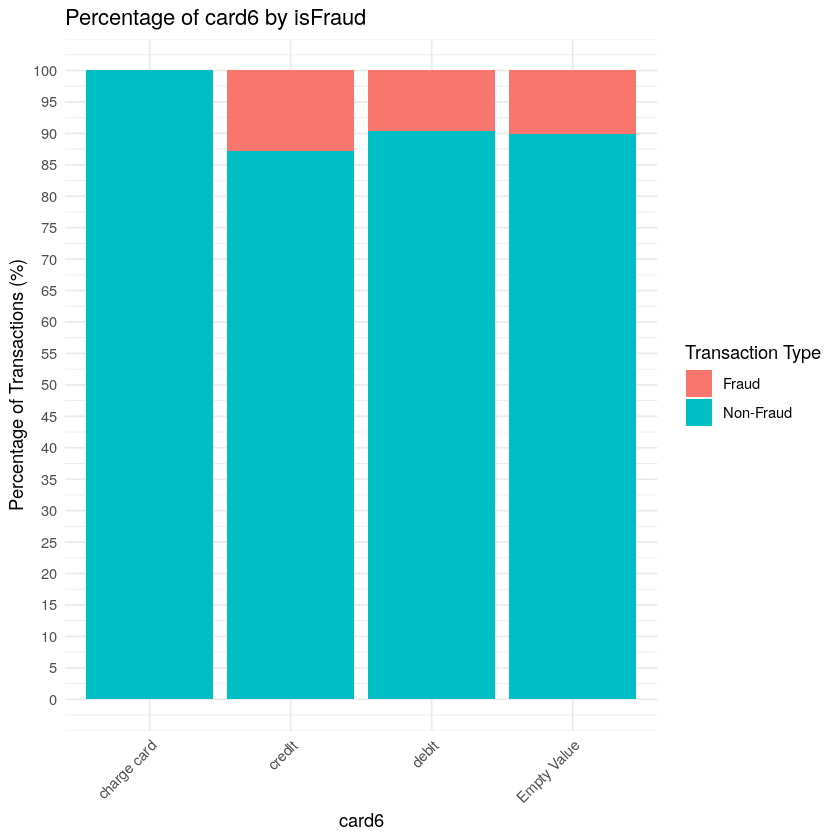

In [67]:
# view the percentage of card6 group by isFraud ------------------------------------------------
card6_fraud_percentage <- data %>%
  group_by(card6) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card6_fraud_percentage)


# visualize the count of card6 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card6, fill = factor(isFraud))) +
  geom_bar(position = "dodge") +
  labs(title = "Count of card6 by isFraud",
       x = "card6",
       y = "Count",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
# visualize the percentage of card6 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card6_plot_data <- card6_fraud_percentage %>%
  select(card6, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  )) 

  # Create the plot with proper dodged bars
ggplot(card6_plot_data, aes(x = card6, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +

  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card6 by isFraud",
       x = "card6",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 5 × 6
  has_card2 has_card3 has_card5 count combination      percentage
  <lgl>     <lgl>     <lgl>     <int> <chr>                 <dbl>
1 FALSE     FALSE     FALSE        12 None of any Card     0.106 
2 FALSE     TRUE      FALSE         2 Card3 Only           0.0177
3 FALSE     TRUE      TRUE        224 Card3 + Card5        1.98  
4 TRUE      TRUE      FALSE        52 Card2 + Card3        0.459 
5 TRUE      TRUE      TRUE      11028 All Three Cards     97.4   


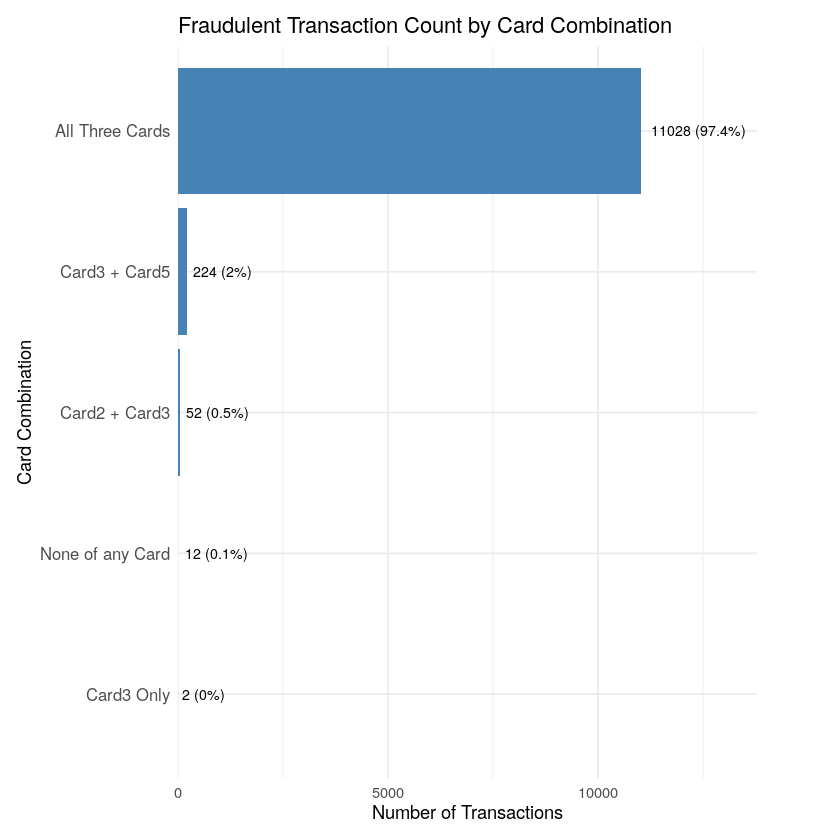

In [ ]:
# Enhanced card intersection analysis
# Create a comprehensive analysis of card combinations in fraudulent transactions
fraud_data <- data %>% filter(isFraud == 1)

# Count transactions by card availability
card_combinations <- fraud_data %>%
  mutate(
    has_card2 = !is.na(card2),
    has_card3 = !is.na(card3), 
    has_card5 = !is.na(card5)
  ) %>%
  group_by(has_card2, has_card3, has_card5) %>%
  summarise(count = n(), .groups = 'drop') %>%
  mutate(
    combination = case_when(
      has_card2 & has_card3 & has_card5 ~ "All Three Cards",
      has_card2 & has_card3 & !has_card5 ~ "Card2 + Card3",
      has_card2 & !has_card3 & has_card5 ~ "Card2 + Card5", 
      !has_card2 & has_card3 & has_card5 ~ "Card3 + Card5",
      has_card2 & !has_card3 & !has_card5 ~ "Card2 Only",
      !has_card2 & has_card3 & !has_card5 ~ "Card3 Only",
      !has_card2 & !has_card3 & has_card5 ~ "Card5 Only",
      TRUE ~ "None of any Card"
    ),
    percentage = (count / sum(count)) * 100
  )

print(card_combinations)

# Visualize card combinations with proper spacing
ggplot(card_combinations, aes(x = reorder(combination, count), y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Fraudulent Transaction Count by Card Combination",
       x = "Card Combination",
       y = "Number of Transactions") +
  theme_minimal() +
  geom_text(aes(label = paste0(count, " (", round(percentage, 1), "%)")), 
            hjust = -0.1, size = 3) +
  # Expand plot limits to accommodate text labels
  scale_y_continuous(expand = expansion(mult = c(0, 0.25))) +
  # Ensure all labels are visible
  theme(
    plot.margin = margin(10, 50, 10, 10),  # top, right, bottom, left
    axis.text.y = element_text(size = 10)
  )
  

# A tibble: 4 × 5
  ProductCD FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>          <int>         <int>           <dbl>              <dbl>
1 AD               684          7255            8.62               91.4
2 LY              7640         36492           17.3                82.7
3 TP              1571         20835            7.01               93.0
4 WF              1423         24100            5.58               94.4


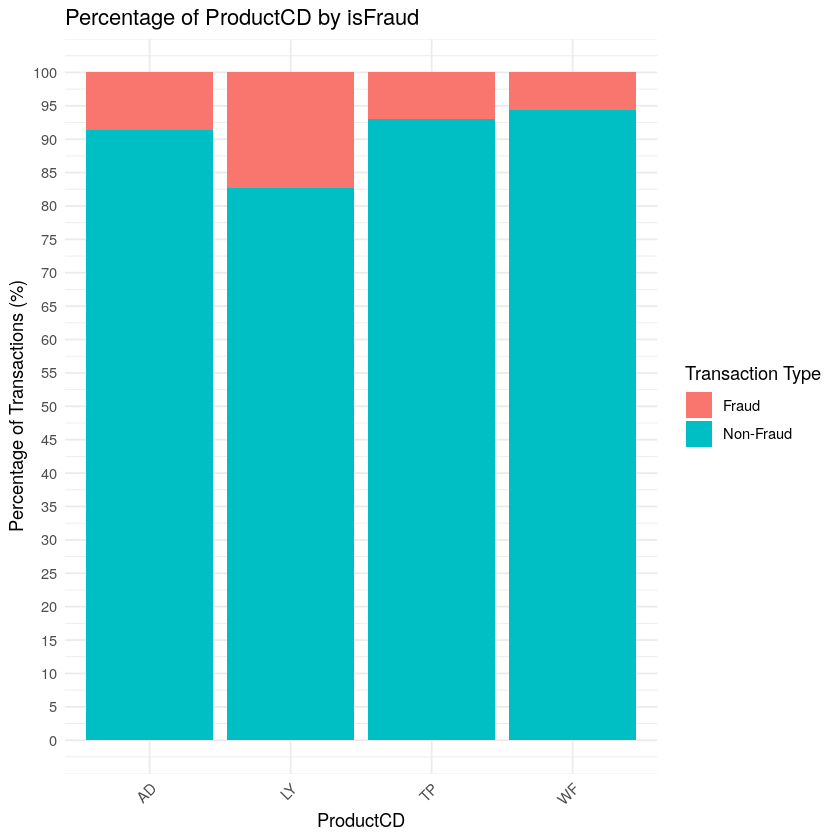

In [69]:
# view the percentage of ProductCD group by isFraud ------------------------------------------------
productcd_fraud_percentage <- data %>%
  group_by(ProductCD) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(productcd_fraud_percentage)   

# visualize the percentage of ProductCD group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
productcd_plot_data <- productcd_fraud_percentage %>%
  select(ProductCD, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(productcd_plot_data, aes(x = ProductCD, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 2 × 5
  addr1_is_na FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 NA                7433         35448           17.3                82.7
2 Not NA            3885         53234            6.80               93.2


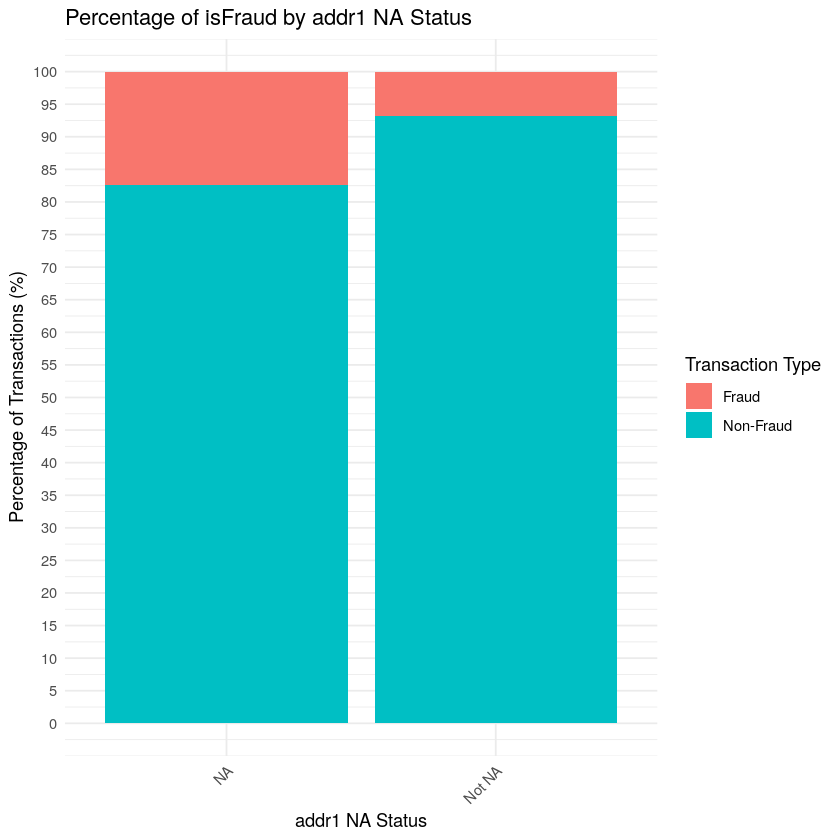

In [70]:
# view the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
addr1_fraud_summary <- data %>%
  mutate(addr1_is_na = ifelse(is.na(addr1), "NA", "Not NA")) %>%
  group_by(addr1_is_na) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(addr1_fraud_summary)

# visualize the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
# First, reshape the data for better plotting
addr1_plot_data <- addr1_fraud_summary %>%
  select(addr1_is_na, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(addr1_plot_data, aes(x = addr1_is_na, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of isFraud by addr1 NA Status",
       x = "addr1 NA Status",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")